In [1]:
import oommfc as oc
import discretisedfield as df
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import colorsys

plt.style.use('styles/lato_style.mplstyle')

In [2]:
def convert_to_RGB(hls_color):
           return np.array(colorsys.hls_to_rgb(hls_color[0] / (2 * np.pi),
                                               hls_color[1],
                                               hls_color[2]))
def generate_RGBs(field_data):
    """
    field_data      ::  (n, 3) array
    """
    hls = np.ones_like(field_data)
    hls[:, 0] = np.arctan2(field_data[:, 1],
                           field_data[:, 0]
                           )
    hls[:, 0][hls[:, 0] < 0] = hls[:, 0][hls[:, 0] < 0] + 2 * np.pi
    hls[:, 1] = 0.5 * (field_data[:, 2] + 1)
    rgbs = np.apply_along_axis(convert_to_RGB, 1, hls)

    # Redefine colours less than zero
    # rgbs[rgbs < 0] += 2 * np.pi

    return rgbs

Initial states:

In [3]:
R = 30e-9  # bubble radius
w = 30e-9   # dw width
a = 130 * np.pi / 180


def init_m_lattice(pos):
    
    xm, ym = 160e-9, 100e-9
    for xc, yc in [[0, 0], [-xm, -ym], [xm, -ym], [xm, ym], [-xm, ym]]:
    
        x, y = pos[0] - xc, pos[1] - yc
        r = np.sqrt(x ** 2 + y ** 2)
        phi = np.arctan2(y, x)
        
        if r <= R:

            if (phi < 10 * np.pi / 180) or (phi < 0 and phi > -170 * np.pi / 180):
                factor = 1
            else: 
                factor = -1


            sech = 1 / np.cosh(np.pi * (r - R) / w)

            mx = factor * sech * (-np.sin(phi + a))
            my = factor * sech * (np.cos(phi + a))
            mz = 1 - (mx ** 2 + my ** 2)

            #     if r < R:
            #         mz = -(1 - (mx ** 2 + my ** 2))
            #     else:
            #         mz = (1 - (mx ** 2 + my ** 2))

            return (mx, my, mz)
    
    return (0, 0, 1)

def init_m(pos):
        
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)

    if (phi < 10 * np.pi / 180) or (phi < 0 and phi > -170 * np.pi / 180):
        factor = 1
    else: 
        factor = -1

    sech = 1 / np.cosh(np.pi * (r - R) / w)
    mx = factor * sech * (-np.sin(phi + a))
    my = factor * sech * (np.cos(phi + a))
    # mz = 1 - (mx ** 2 + my ** 2)
    
    if r < R:
        mz = -(1 - (mx ** 2 + my ** 2))
    else:
        mz = (1 - (mx ** 2 + my ** 2))
    
    return (mx, my, mz)

def init_dot(pos):
        
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    
    if r < R:
        mz = -1
    else:
        mz = 1
    
    return (0, 0, mz)

def init_type2bubble(pos):
    R = 80e-9
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x) + 0.5 * np.pi
    
    k = np.pi / R
    
    if r < R and y > 0:
        m = (np.sin(k * r) * np.cos(phi), np.sin(k * r) * np.sin(phi), -np.cos(k * r))
    elif r < R and y < 0:
        m = (-np.sin(k * r) * np.cos(phi), -np.sin(k * r) * np.sin(phi), -np.cos(k * r))
    else:
        m = (0, 0, 1)
    
    return m

def init_type2bubble_bls(pos):
    R = 80e-9
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    phi_b = np.arctan2(y, x) + 0.5 * np.pi
    
    k = np.pi / R
    
    if r < R and y > 0 and phi < np.pi * 0.5:
        m = (-np.sin(k * r) * np.cos(phi_b), -np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y > 0 and phi > np.pi * 0.5:
        m = (np.sin(k * r) * np.cos(phi_b), np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y < 0 and np.abs(phi) > np.pi * 0.5:
        m = (-np.sin(k * r) * np.cos(phi_b), -np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y < 0 and np.abs(phi) < np.pi * 0.5:
        m = (np.sin(k * r) * np.cos(phi_b), np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    else:
        m = (0, 0, 1)
    
    return m

def init_type2bubble_bls_II(pos):
    R = 80e-9
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    phi_b = np.arctan2(y, x) + 0.5 * np.pi
    
    k = np.pi / R
    
    if r < R and y > 0:
        m = (np.sin(k * r) * np.cos(phi_b), np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y < 0:
        m = (-np.sin(k * r) * np.cos(phi_b), -np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    else:
        m = (0, 0, 1)
    
    return m

def init_type2bubble_neel(pos):
    R = 80e-9
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    phi_b = np.arctan2(y, x)
    
    k = np.pi / R
    
    if r < R and y > 0 and phi < np.pi * 1:
        m = (-np.sin(k * r) * np.cos(phi_b), -np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y > 0 and phi > np.pi * 1:
        m = (np.sin(k * r) * np.cos(phi_b), np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y < 0 and np.abs(phi) > np.pi * 1:
        m = (-np.sin(k * r) * np.cos(phi_b), -np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y < 0 and np.abs(phi) < np.pi * 1:
        m = (np.sin(k * r) * np.cos(phi_b), np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    else:
        m = (0, 0, 1)
    
    return m

def init_type2bubble_neel_II(pos):
    R = 80e-9
    x, y = pos[0], pos[1]
    r = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    phi_b = np.arctan2(y, x)
    
    k = np.pi / R
    
    if r < R and y > 0:
        m = (np.sin(k * r) * np.cos(phi_b), np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    elif r < R and y < 0:
        m = (-np.sin(k * r) * np.cos(phi_b), -np.sin(k * r) * np.sin(phi_b), -np.cos(k * r))
    else:
        m = (0, 0, 1)
    
    return m

np.random.seed(42)
def init_random(pos):
    m = 2 * np.random.random((1, 3)) - 1
    
    return m

In [4]:
mu0 = 4 * np.pi * 1e-7

# A = 12e-12
# Ms = 5.37e5
# Ku = 187952
# B = 180e-3

A = 20e-12
Ms = 0.648 / mu0
Ku = A / 2.3e-16

# Apply field in an angle
B = 0.2
theta_B = 0 * np.pi / 180
phi_B = 0 * np.pi / 180

print('lex = ', np.sqrt(2 * A / (mu0 * Ms ** 2)))

mesh = oc.Mesh(p1=(-400e-9, -400e-9, -50e-9), p2=(400e-9, 400e-9, 50e-9), 
               cell=(5e-9, 5e-9, 5e-9))

system = oc.System(name='oommf_typeII_bubble')
# Add interactions
system.hamiltonian = (oc.Exchange(A=A) + oc.UniaxialAnisotropy(K1=Ku, u=(0, 0, 1)) 
                      + oc.Demag() 
                      + oc.Zeeman((np.cos(phi_B) * np.sin(theta_B) * B / mu0, 
                                   np.sin(phi_B) * np.sin(theta_B) * B / mu0, 
                                   np.cos(theta_B) * B / mu0))
                      )

system.m = df.Field(mesh, value=init_m, norm=Ms)

lex =  1.094107315373775e-08


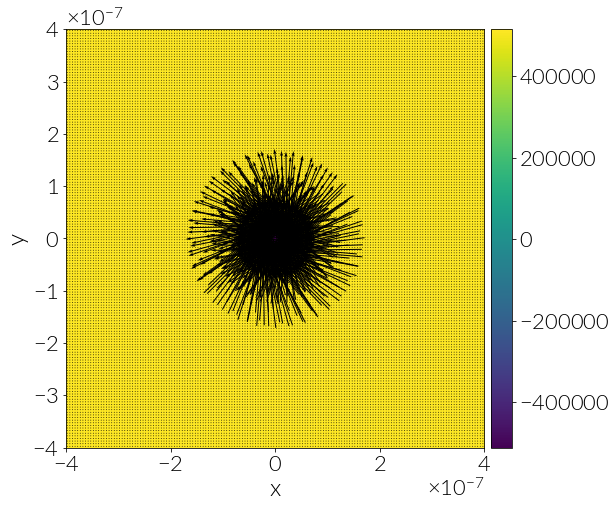

In [5]:
f, ax = plt.subplots(ncols=1, figsize=(8, 8))
system.m.plot_plane('z', ax=ax)

Relax the system:

In [ ]:
md = oc.MinDriver()

md.drive(system)

2018/09/17 14:26: Running OOMMF (oommf_typeII_bubble/oommf_typeII_bubble.mif) ... 

Extract the simulation data:

In [ ]:
# A list of tuples with the coordinates in the order of systems[2]
coordinates = list(system.m.mesh.coordinates)

# Turn coordinates into a (N, 3) array and save in corresponding variables
# scaled in nm
coordinates = np.array(coordinates)
x_oommf, y_oommf, z_oommf = coordinates[:, 0] * 1e9, coordinates[:, 1] * 1e9, coordinates[:, 2] * 1e9
xs, ys, zs = np.unique(x_oommf), np.unique(y_oommf), np.unique(z_oommf)
# phi_oommf = np.arctan2(y_oommf, x_oommf)
 
# Get the magnetisation for every coordinate in the magnetisation list
values = []
for c in coordinates:
    values.append(system.m(c))
values = np.array(values)

# Save them in the corresponding row and column of the m list
# mx, my, mz:
mx, my, mz = (values[:, 0] / Ms, values[:, 1] / Ms,values[:, 2] / Ms)

# mphi = lambda z_i: (-mx_O * np.sin(phi_O) + my_O * np.cos(phi_O))[_filter_y_O(z_i)]
# mr = lambda z_i: (mx_O * np.cos(phi_O) + my_O * np.sin(phi_O))[_filter_y_O(z_i)]

In [ ]:
# Optionally save the data:
# 
# np.savetxt('coordinates_typeIIbubble_800nmx800nmx100nm.txt', coordinates)
# np.savetxt('mx_typeIIbubble_800nmx800nmx100nm.txt', mx)
# np.savetxt('my_typeIIbubble_800nmx800nmx100nm.txt', my)
# np.savetxt('mz_typeIIbubble_800nmx800nmx100nm.txt', mz)

In [ ]:
# Make an average through the thickness
z_filter = z_oommf == np.unique(z_oommf)[0]
av_map_x = np.copy(np.zeros_like(mx[z_filter]))
av_map_y = np.copy(np.zeros_like(mx[z_filter]))
av_map_z = np.copy(np.zeros_like(mx[z_filter]))

for layer in np.unique(z_oommf)[:]:
    z_filter = z_oommf == layer
    av_map_x += mx[z_filter]
    av_map_y += my[z_filter]
    av_map_z += mz[z_filter]
    
av_map_x /= len(np.unique(z_oommf)[:])
av_map_y /= len(np.unique(z_oommf)[:])
av_map_z /= len(np.unique(z_oommf)[:])

Plot the the system at the bottom layer:

In [ ]:
f, ax = plt.subplots(ncols=1, figsize=(8, 8))

z_filter = z_oommf == np.unique(z_oommf)[0]
rgb_map = generate_RGBs(np.column_stack((mx, my, mz)))
plt.scatter(x_oommf[z_filter], y_oommf[z_filter], c=rgb_map[z_filter])
# plt.scatter(x_oommf, y_oommf, c=rgb_map)

# Arrows filter
arr_fltr_tmp = np.zeros(len(xs))
arr_fltr_tmp[::6] = 1
arr_fltr = np.zeros_like(x_oommf[z_filter]).reshape(len(xs), -1)
arr_fltr[::6] = arr_fltr_tmp
arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)

plt.quiver(x_oommf[z_filter][arr_fltr], y_oommf[z_filter][arr_fltr], 
           mx[z_filter][arr_fltr], my[z_filter][arr_fltr],
           scale=None)

# plt.savefig('oommf_bubble_tilted_30deg_y-axis-neg.jpg', dpi=300, bbox_inches='tight')

Plot the average:

In [ ]:
f, ax = plt.subplots(ncols=1, figsize=(8, 8))

z_filter = z_oommf == np.unique(z_oommf)[0]
rgb_map = generate_RGBs(np.column_stack((av_map_x, av_map_y, av_map_z)))
plt.scatter(x_oommf[z_filter], y_oommf[z_filter], c=rgb_map)

# Arrows filter
arr_fltr_tmp = np.zeros(len(xs))
arr_fltr_tmp[::6] = 1
arr_fltr = np.zeros_like(x_oommf[z_filter]).reshape(len(xs), -1)
arr_fltr[::6] = arr_fltr_tmp
arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)

plt.quiver(x_oommf[z_filter][arr_fltr], y_oommf[z_filter][arr_fltr], 
           av_map_x[arr_fltr], av_map_y[arr_fltr],
           scale=None)

# plt.savefig('av_map_thickness_quiver.jpg', dpi=300, bbox_inches='tight')